# FPNA Variations from Different Distributions

Here we look at how FPNA causes variations in summations (reductions) for some different distributions.

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib

plt.rcParams['text.usetex'] = True
font = {'family' : 'sans-serif',
        'sans-serif': 'arial',
        'size'   : 16}

matplotlib.rc('font', **font)

cm = 1/2.54  # centimeters in inches
width = 8.86
matplotlib.rcParams['figure.figsize'] = (width, width/1.62)

## Distribution and Array Sums

In [245]:
rng = np.random.default_rng()

# distribution is a function that takes number of elements to generate as an argument
def fpna_report(distribution):
    array_sizes = np.array([1000,2500,5000,7500,10000,])#25000,50000,75000,100000])
    counts, edges = np.histogram(distribution(np.max(array_sizes)),bins=20)
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.4*2,4.8))

    ax1.stairs(counts, edges, fill=True)
    ax1.vlines(edges, 0, counts.max(), colors='white')
    ax1.set_yticks([])


    for i in range(3):
        sum_diff_means = np.array([])
        sum_diff_errs = np.array([])
        max_errs = np.array([])
        for array_size in array_sizes:
            data = distribution(array_size).astype(np.float128)
            total = np.sum(data).astype(np.float32)
            data = data.astype(np.float32)
            ITER = 5000
            diffs = np.array([])
            for _ in range(ITER):
                diffs = np.append(diffs, total - np.sum(np.random.permutation(data)))
            rel_diffs = np.abs(diffs)/np.abs(total)
            sum_diff_means = np.append(sum_diff_means, np.mean(rel_diffs))
            sum_diff_errs = np.append(sum_diff_errs, np.std(rel_diffs))
            max_errs = np.append(max_errs, np.max(rel_diffs))

    
        xpos = np.array([(1+0.1*i)*size for size in array_sizes])
        ax2.errorbar(xpos, sum_diff_means, sum_diff_errs, linestyle="None", marker="o")
        ax2.scatter(xpos, max_errs, linestyle="None", marker="o", facecolor="None", edgecolors=['black'])

    ax2.hlines(y=0.0,xmin=0,xmax=array_sizes[-1]*2, linestyle="dashed", color="dimgray")
    ax2.set_xlabel(r"$N$")
    ax2.set_xlim(array_sizes[0]*0.5,(1+0.2)*1.05*array_sizes[-1])
    #ax2.set_xscale('log')

    
        

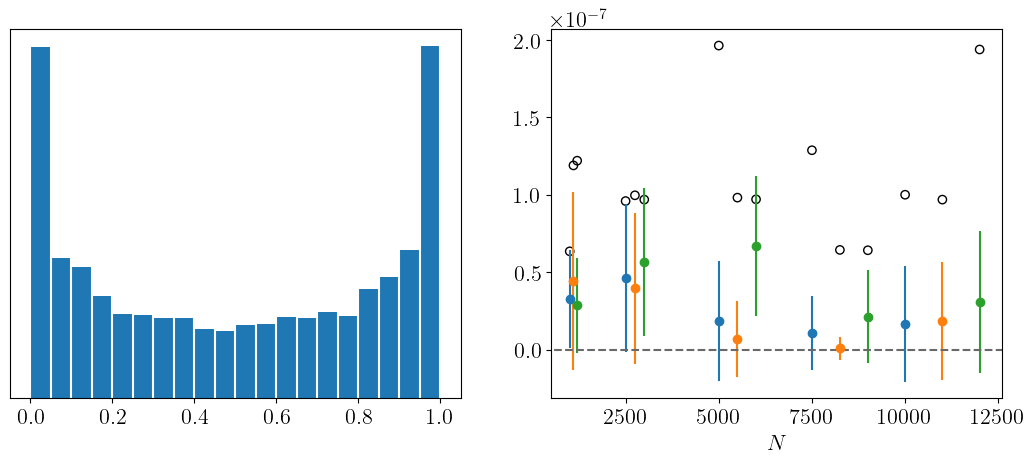

In [246]:
distribution = lambda size : rng.beta(a=0.5,b=0.5,size=(size))
fpna_report(distribution)

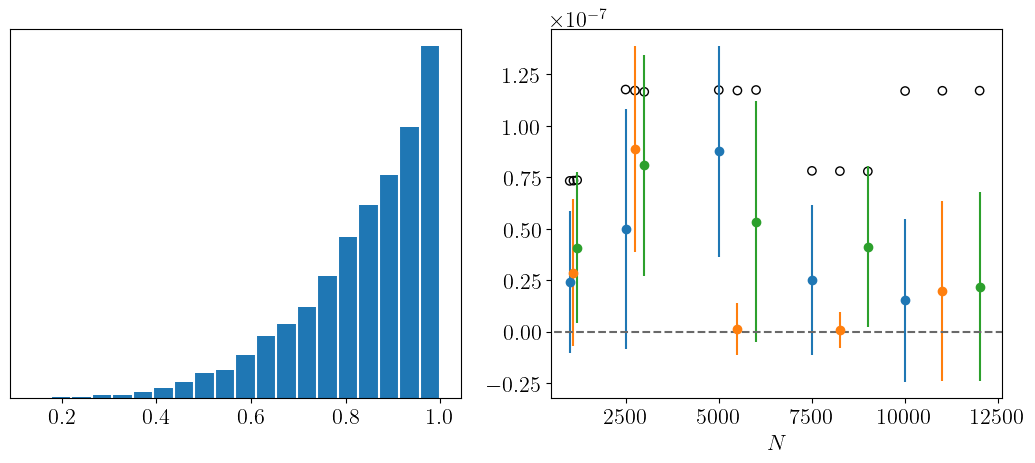

In [247]:
distribution = lambda size : rng.beta(a=5,b=1.0,size=(size))
fpna_report(distribution)

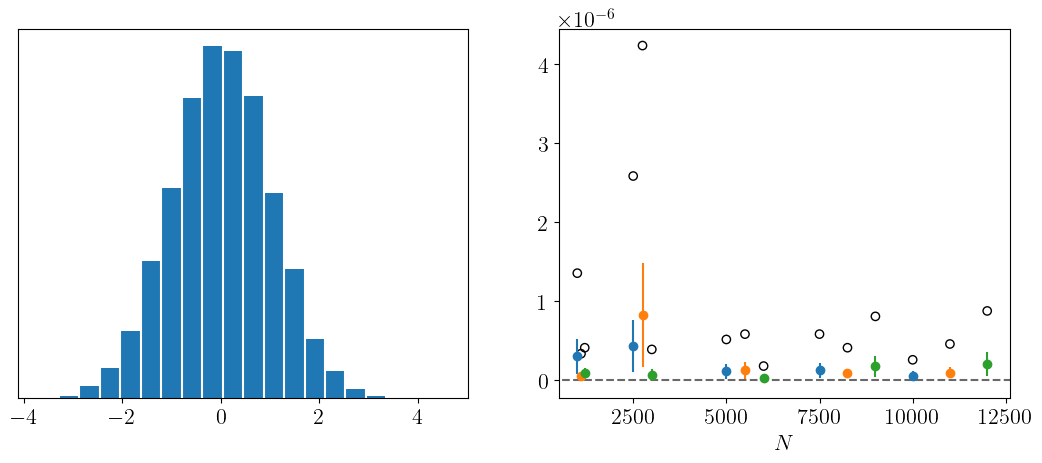

In [248]:
distribution = lambda size : rng.normal(loc=0.0,scale=1.0,size=(size))
fpna_report(distribution)

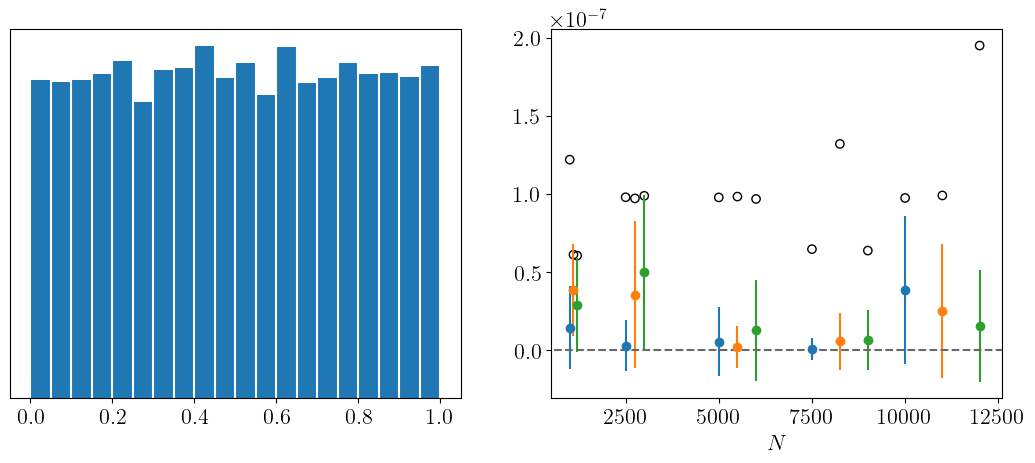

In [249]:
distribution = lambda size : rng.uniform(low=0.0,high=1.0,size=(size))
fpna_report(distribution)

## Mat-vec multiplication variabilities



In [ ]:
# matrix & vector from distributions 
# do the mul - permute the add over rows
# check results

# Miscellaneous numerics testing

In [66]:
np.mean(diffs)/total

-1.0346238387098188524e-09

In [67]:
np.max(diffs)/total

1.8952673375493062502e-07

In [60]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [61]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [77]:
np.finfo(np.float32).max

3.4028235e+38

In [92]:
np.finfo(np.float32).max+np.finfo(np.float32).eps

3.4028235e+38

In [93]:
np.finfo(np.float32).max+np.finfo(np.float32).eps

3.4028235e+38

In [91]:
np.finfo(np.float32).max

3.4028235e+38

In [68]:
np.finfo(np.float32).eps

1.1920929e-07